# Train a baseline model

In [4]:
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
from tensorflow.keras import *

## combine all image data into one array

In [20]:
from PIL import Image
import glob

X_list = []
y_1_list = []
y_2_list = []
for filename in glob.glob('data/train/Input/*.png'): 
    
    # modify string to get file name for lables
    filename_label1 = filename.replace("Input", "Label1")
    filename_label2 = filename.replace("Input", "Label2")
    
    # append img to list
    with Image.open(filename) as x:
        X_list.append(np.asarray(x))
    with Image.open(filename_label1) as y1:
        y_1_list.append(np.asarray(y1))
    with Image.open(filename_label2) as y2:
        y_2_list.append(np.asarray(y2))
    

In [21]:
X = np.array(X_list)
y1 = np.array(y_1_list)
y2 = np.array(y_2_list)

In [27]:
# save data to npz format
np.savez("train_data.npz", X=X, y1=y1, y2=y2)

In [5]:
data = np.load("train_data.npz")

In [30]:
sorted(data.files)

['X', 'y1', 'y2']

In [6]:
X = data["X"]
y1 = data["y1"]
y2 = data["y2"]

## Visualisation

([], [])

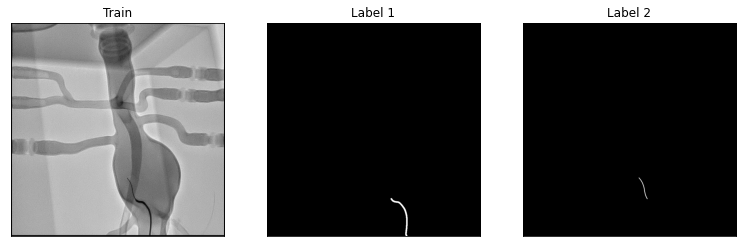

In [38]:
fig = plt.figure(figsize=(13,10))

plt.subplot(1,3,1)
plt.imshow(X[0], cmap=plt.cm.gray)
plt.title("Train")
plt.xticks(()); plt.yticks(())

plt.subplot(1,3,2)
plt.imshow(y1[0], cmap=plt.cm.gray)
plt.title("Label 1")
plt.xticks(()); plt.yticks(())

plt.subplot(1,3,3)
plt.imshow(y2[0], cmap=plt.cm.gray)
plt.title("Label 2")
plt.xticks(()); plt.yticks(())

## Label 1

### preprocessing

In [7]:
## Flatten images
num = X.shape[0]
print(num)
X_flatten = X.reshape(num, -1)
y1_flatten = y1.reshape(num, -1)
y2_flatten = y2.reshape(num, -1)

2275


In [8]:
X_flatten.shape

(2275, 921600)

In [7]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(X, y1, test_size=0.25, random_state=3)

In [ ]:
# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

### Simple model with 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

input_dim = X_train.shape[1]
output_dim = y_train.shape[1]


# Model definition
model = Sequential()
model.add(layers.Dense(20, activation='relu', input_dim=713))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()